In [48]:
file = "/media/tool/moved_from_m2/cartana_test_stitched/results/decoded/concat_decoded_genes.csv"

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
df = pd.read_csv(file)
n_spots = len(df)

In [63]:
print(df)

         Unnamed: 0  Tile     X     Y  Barcode   Gene
0                 0    64     0     0    41424    NaN
1                 1    64     0   208    31211  Tafa1
2                 2    64     0   318    33324    NaN
3                 3    64     0   375    41421    NaN
4                 4    64     0   475    44124   Hopx
...             ...   ...   ...   ...      ...    ...
2336342       33376    19  2199  1960    21442    NaN
2336343       33377    19  2199  1987    14443    NaN
2336344       33378    19  2199  2016    44313    NaN
2336345       33379    19  2199  2027    44114   Lhx6
2336346       33380    19  2199  2053    43443    NaN

[2336347 rows x 6 columns]


In [54]:
df['Counted'] = df.groupby('Barcode')['Gene'].transform('size')

In [60]:
small_df = df[['Barcode', 'Counted']]
small_df = small_df.drop_duplicates()
len(small_df)

1024

In [156]:
## simulate random basecalling: 
import random
import numpy as np
num_list=[]

barcode_list = []
for i in range(1, 500000):
    randint = np.random.randint(1,5,5)
    string_ints = [str(int) for int in randint]
    barcode= int("".join(string_ints))
    barcode_list.append(barcode)
counted = [barcode_list.count(entry) for entry in barcode_list] 

d={'Barcode': barcode_list, 'Counted': counted}
simulated_df = pd.DataFrame(d).drop_duplicates()

KeyboardInterrupt: 

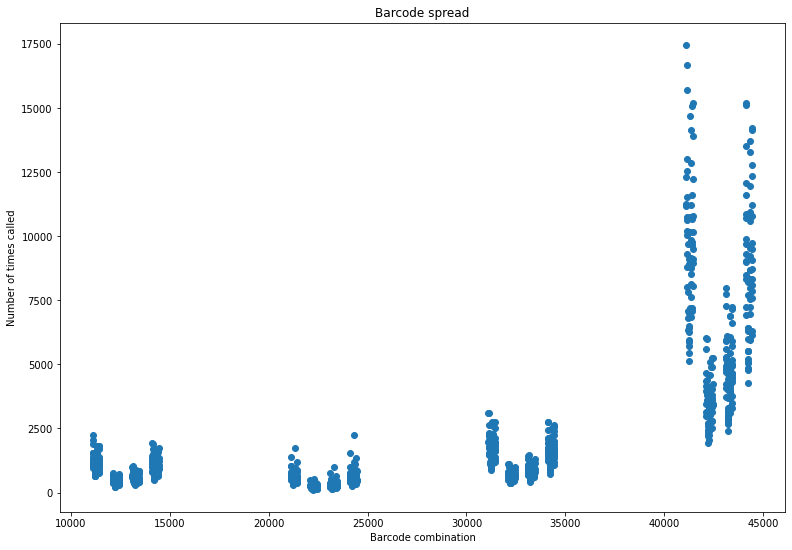

In [61]:
fig= plt.figure(figsize=(13,9)) 
plt.plot(simulated_df['Barcode'], simulated_df['Counted'], 'o')
plt.title("Barcode spread")
plt.xlabel("Barcode combination")
plt.ylabel("Number of times called")
plt.savefig("/home/nacho/Documents/usable_images/decoding/simulated_barcodes_called_spread.pdf")